In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import seaborn as sns
import xgboost as xgb

In [2]:
df = pd.read_csv('/kaggle/input/credit-card/application_data.csv')

In [3]:
# Drop irrelevant columns
print(df.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

I found that a lot of these columns did not pertain to fraud detection

In [4]:
columns_to_remove = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
                     'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
                     'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
                     'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                     'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
                     'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                     'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                     'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','HOUR_APPR_PROCESS_START']

df = df.drop(columns_to_remove, axis=1)

In [5]:
# Percentage of Missing Values


# Set the pandas option to display all rows
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the missing_percentage Series in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Print the sorted missing_percentage Series
print(missing_percentage_sorted)

# Reset the pandas option to the default value
pd.reset_option('display.max_rows')

OWN_CAR_AGE                    65.990810
OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_LIVE_REGION      0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
FLAG_PHONE                      0.000000
ORGANIZATION_TYPE               0.000000
FLAG_EMAIL      

For columns with a very low percentage of missing values (e.g., AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE), you can impute the missing values using the mean, median, or mode.


In [6]:
columns_to_impute = ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

for col in columns_to_impute:
    mode = df[col].mode().iloc[0]
    df[col].fillna(mode, inplace=True)

For categorical variables with missing values (e.g., OCCUPATION_TYPE, NAME_TYPE_SUITE), I will using mode imputation


In [7]:
columns_to_impute = ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

for col in columns_to_impute:
    mode = df[col].mode().iloc[0]
    df[col].fillna(mode, inplace=True)

For categorical variables with missing values (e.g., OCCUPATION_TYPE, NAME_TYPE_SUITE),I am once again using mode imputation


In [8]:
categorical_columns = ['OCCUPATION_TYPE', 'NAME_TYPE_SUITE']
for col in categorical_columns:
    mode = df[col].mode().iloc[0]
    df[col].fillna(mode, inplace=True)

For columns related to the Credit Bureau (e.g., AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR), I will fill missing values with 0, assuming no inquiries were made

In [9]:
credit_bureau_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in credit_bureau_columns:
    df[col].fillna(0, inplace = True)

In [10]:
# XNAs are also considered null values
# Find the number of XNA in each column

xna_counts_per_column = df.applymap(lambda x: x == 'XNA').sum()
print(xna_counts_per_column.sort_values(ascending= False))

ORGANIZATION_TYPE              55374
CODE_GENDER                        4
SK_ID_CURR                         0
LIVE_REGION_NOT_WORK_REGION        0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY             0
FLAG_WORK_PHONE                    0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
DAYS_LAST_PHONE_CHANGE             0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
AMT_REQ_CREDIT_BUREAU_MON          0
AMT_REQ_CREDIT_BUREAU_QRT          0
FLAG_CONT_MOBILE                   0
FLAG_EMP_PHONE                     0
TARGET                             0
FLAG_MOBIL                         0
N

In [11]:
# Too many XNA;s in the ORGANIZATION_TYPE column, so we will drop it

df = df.drop('ORGANIZATION_TYPE', axis =1)

In [12]:
# We have 4 XNA values in the gender column, find the dominant gender and replace XNA with that gender

gender_counts = df['CODE_GENDER'].value_counts()

# Calculate the total number of male and female entries
total_gender_count = gender_counts.sum()

# Calculate the percentage of males and females
male_percentage = (gender_counts['M'] / total_gender_count) * 100
female_percentage = (gender_counts['F'] / total_gender_count) * 100

print(male_percentage)
print(female_percentage)


34.164306317497584
65.83439291602576


In [13]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', 'F')

I want to use PCA for dimensionality reduction, however it only works with numerical data types, and no missing values. More preprocesssing before applying PCA

In [14]:
# Remove missing values in numerical column
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the number of missing values for each numeric column
missing_values_count = numeric_columns.isnull().sum()

# Sort the missing values count from high to low
sorted_missing_values_count = missing_values_count.sort_values(ascending=False)

# Print the sorted number of missing values for each numeric column
print("Number of missing values for each numeric column (sorted from high to low):")
print(sorted_missing_values_count)


Number of missing values for each numeric column (sorted from high to low):
OWN_CAR_AGE                    202929
SK_ID_CURR                          0
FLAG_EMAIL                          0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
DAYS_LAST_PHONE_CHANGE              0
AMT_REQ_CREDIT_BUREAU_HOUR          0
AMT_REQ_CREDIT_BUREAU_DAY           0
AMT_REQ_CREDIT_BUREAU_WEEK          0
AMT_REQ_CREDIT_BUREAU_MON           0
AMT_REQ_CREDIT_BUREAU_QRT           0
CNT_FAM_MEMBERS                     0
FLAG_PHONE                          0
TARGET                              0
FLAG_CONT_MOBILE                    0
FLAG_WORK_PHONE                     0
FLAG_EMP_PHONE                      0
FLAG_MOBIL                          0
DAYS_ID_PUBL

In [15]:
df = df.drop('OWN_CAR_AGE', axis =1)

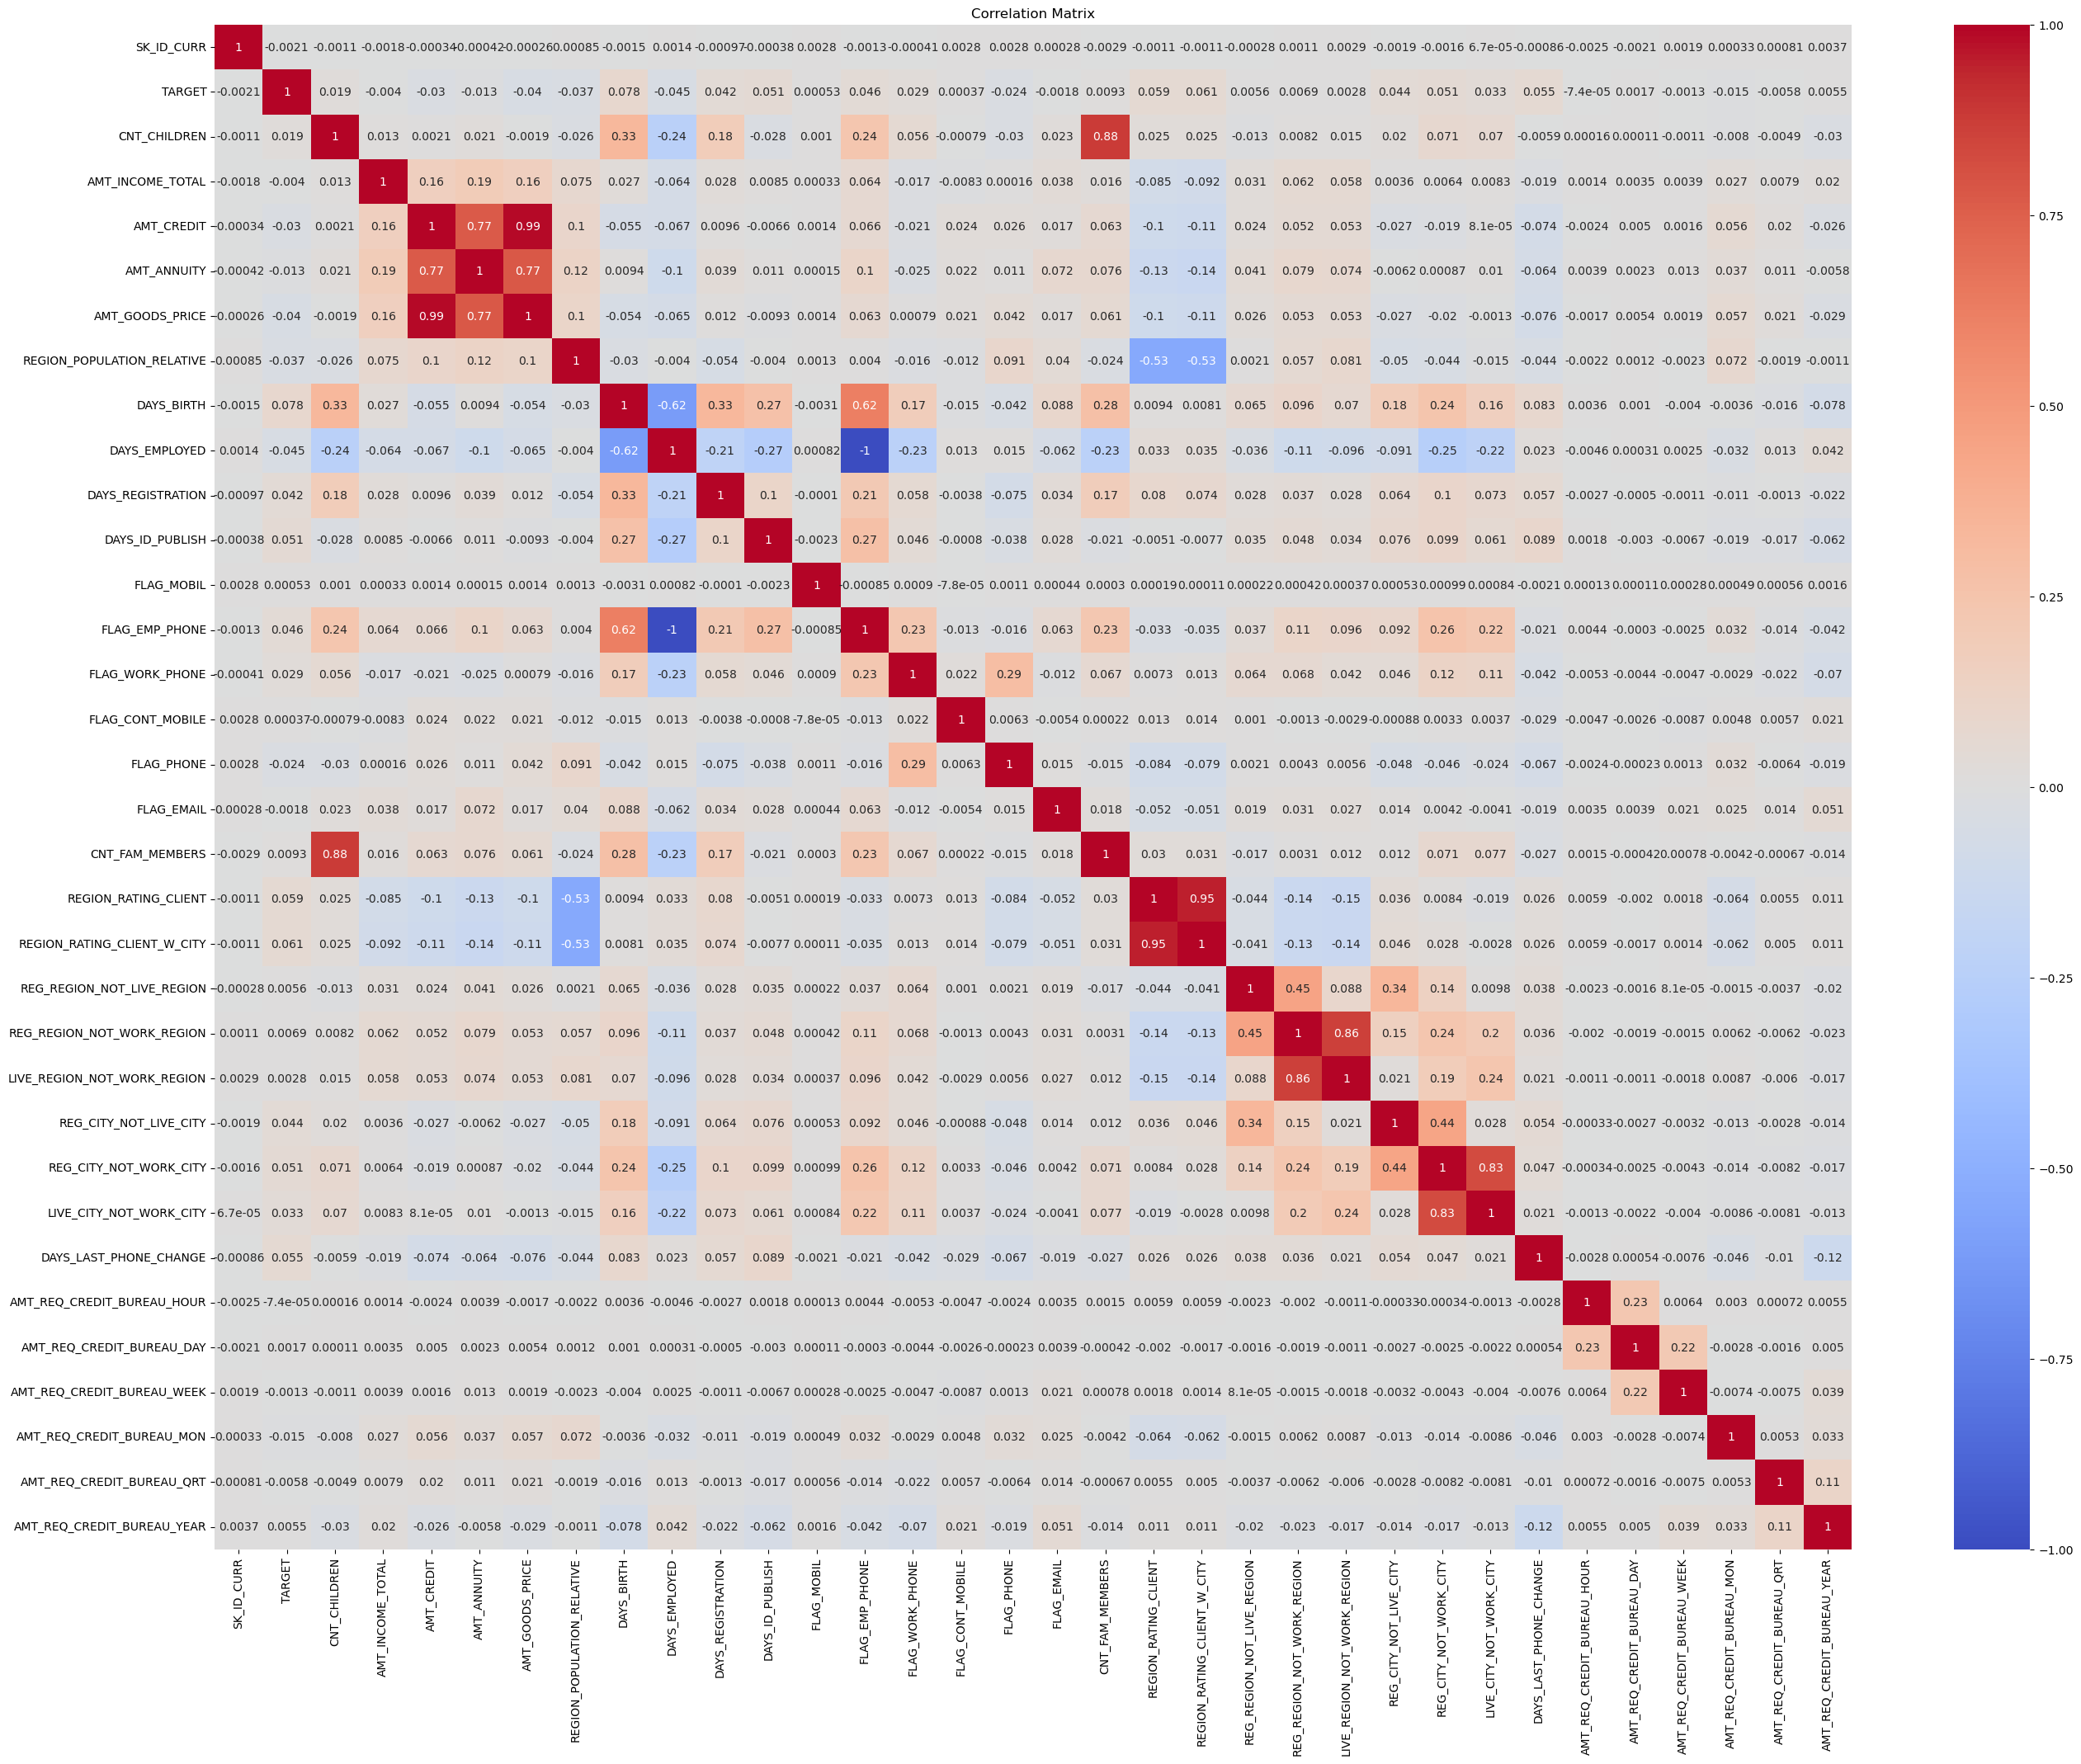

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Set a threshold for high correlation
threshold = 0.7

# Create a mask to filter out self-correlations (correlation of a variable with itself)
mask = correlation_matrix != 1

# Apply the mask to the correlation matrix
filtered_corr_matrix = correlation_matrix[mask]

# Find the pairs of variables with correlation greater than the threshold
high_correlations = filtered_corr_matrix[filtered_corr_matrix.abs() > threshold].stack().reset_index()

# Rename the columns in the high_correlations DataFrame
high_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Sort the DataFrame by the absolute value of the correlation in descending order
high_correlations['Abs Correlation'] = high_correlations['Correlation'].abs()
high_correlations = high_correlations.sort_values(by='Abs Correlation', ascending=False).drop('Abs Correlation', axis=1)

print(high_correlations)
print(df.columns.tolist())

                     Variable 1                   Variable 2  Correlation
7                 DAYS_EMPLOYED               FLAG_EMP_PHONE    -0.999755
8                FLAG_EMP_PHONE                DAYS_EMPLOYED    -0.999755
2                    AMT_CREDIT              AMT_GOODS_PRICE     0.986734
5               AMT_GOODS_PRICE                   AMT_CREDIT     0.986734
10         REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.950842
11  REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT     0.950842
0                  CNT_CHILDREN              CNT_FAM_MEMBERS     0.879160
9               CNT_FAM_MEMBERS                 CNT_CHILDREN     0.879160
12   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION     0.860627
13  LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION     0.860627
14       REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY     0.825575
15      LIVE_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY     0.825575
4                   AMT_ANNUITY       

In [18]:
# Check for multicollinearity by calculating the VIF

selected_columns = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
                       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                       'LIVE_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
                       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

# Keep only numeric columns
selected_columns_numeric = selected_columns.select_dtypes(include=[np.number])

# Calculate VIF for each numeric independent variable
vif_data = pd.DataFrame()
vif_data['Feature'] = selected_columns_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(selected_columns_numeric.values, i) for i in range(selected_columns_numeric.shape[1])]

# Print VIF values
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data_sorted)

                        Feature           VIF
12                   FLAG_MOBIL  14825.577716
13               FLAG_EMP_PHONE  11626.826877
9                 DAYS_EMPLOYED   2501.493541
15             FLAG_CONT_MOBILE    536.928147
20  REGION_RATING_CLIENT_W_CITY    184.135962
19         REGION_RATING_CLIENT    183.485977
4                    AMT_CREDIT    126.037658
6               AMT_GOODS_PRICE    125.226213
18              CNT_FAM_MEMBERS     29.887603
8                    DAYS_BIRTH     29.718160
5                   AMT_ANNUITY     11.770960
25       REG_CITY_NOT_WORK_CITY      9.737286
22   REG_REGION_NOT_WORK_REGION      9.533795
0                    SK_ID_CURR      8.324915
23  LIVE_REGION_NOT_WORK_REGION      7.650281
26      LIVE_CITY_NOT_WORK_CITY      7.336317
2                  CNT_CHILDREN      6.226655
11              DAYS_ID_PUBLISH      5.607754
7    REGION_POPULATION_RELATIVE      4.681603
10            DAYS_REGISTRATION      3.458540
24       REG_CITY_NOT_LIVE_CITY   

In [19]:
# Remove values with high VIF
high_vif_remove = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'FLAG_CONT_MOBILE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH']

df = df.drop(high_vif_remove, axis=1)

In [20]:
# Feature engineering

# Determine the riskiness of the loans
df['LTV_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']

df['LTI_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

We have an imbalanced dataset, let's try some of these strategies to make sure that the imbalanced dataset gives us more precise predictions

1. Undersampling: Randomly remove instances from the majority class (in this case, non-fraudulent clients) to balance the dataset. This method can lead to a loss of information, as you're discarding potentially useful data.

2. Oversampling: Randomly duplicate instances from the minority class (in this case, fraudulent clients) to balance the dataset. This method can lead to overfitting, as it's creating copies of the same data points.2. 

In [21]:
# Separate majority and minority classes
df_majority = df[df.TARGET == 0]
df_minority = df[df.TARGET == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine the downsampled majority class and the minority class
df_undersampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_undersampled.TARGET.value_counts())

0    24825
1    24825
Name: TARGET, dtype: int64


In [22]:
# Oversampling 

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine the upsampled minority class and the majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.TARGET.value_counts())


0    282686
1    282686
Name: TARGET, dtype: int64


In [23]:
# Separate the features and the target variable
X = df_undersampled.drop('TARGET', axis=1)
y = df_undersampled['TARGET']

# Get the columns that contain categorical variables
cat_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical variables
X = pd.get_dummies(X, columns=cat_cols)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object and fit it to the standardized features
pca = PCA()
pca.fit(X_std)

PCA()

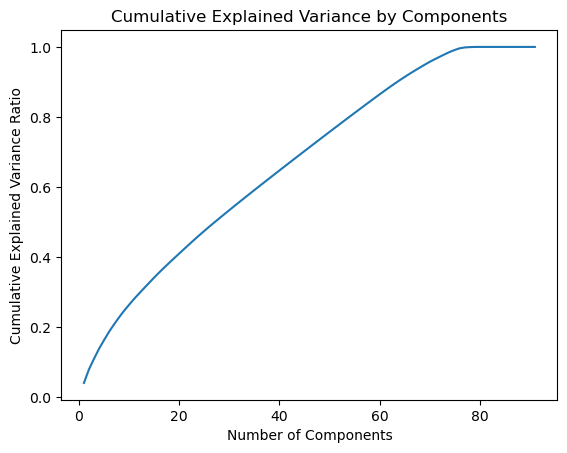

In [24]:
# Plot the explained variance ratio
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

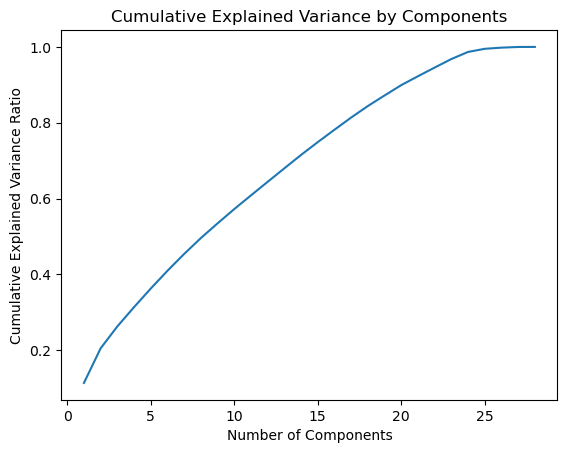

In [25]:
# PCA for Undersampled Data

# Select only numeric columns
X_numeric = df_undersampled.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_numeric)

# Create a PCA object and fit it to the standardized features
pca = PCA()
pca.fit(X_std)

# Plot the explained variance ratio
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

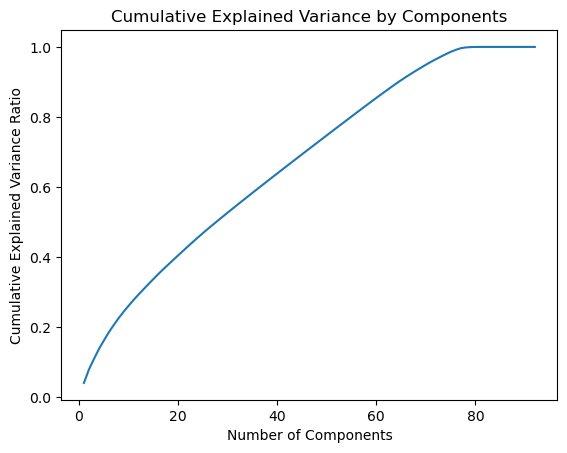

In [26]:
# PCA for Oversampled Data
# Get the columns that contain categorical variables
cat_cols = df_upsampled.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical variables
df_upsampled = pd.get_dummies(df_upsampled, columns=cat_cols)

# Separate the features and the target variable
X = df_upsampled.drop('TARGET', axis=1)
y = df_upsampled['TARGET']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object and fit it to the standardized features
pca = PCA()
pca.fit(X_std)

# Plot the explained variance ratio
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [27]:
# Model training
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and testing sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Train an XGBoost model
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71     42331
           1       0.71      0.72      0.71     42475

    accuracy                           0.71     84806
   macro avg       0.71      0.71      0.71     84806
weighted avg       0.71      0.71      0.71     84806



In [28]:
# Define XGBoost classifier with default hyperparameters
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', early_stopping_rounds=10)

# Define the range of hyperparameters to search over
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 1]
}

I will be hypertunning parameters. PLEASE DO NOT RUN THIS CODE BELOW. It will take a long time to execute as grid search is a very computationally expensive algorithm. I will just print my output instead

In [29]:

#grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

#grid_search.fit(X_train, y_train,
           #     eval_set=[(X_valid, y_valid)])

#print("Best parameters: ", grid_search.best_params_)
#print("Best F1 score: ", grid_search.best_score_)


In [30]:
# Best parameters:  {'gamma': 0, 'learning_rate': 1, 'max_depth': 9, 'n_estimators': 1000}
# Best F1 score:  0.9677071291204464

In [31]:
# Save the trained model as a serialized file
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)